# Monte Carlo Methods
* https://numpy.org/doc/stable/reference/random/index.html

In [348]:
import numpy as np
import pandas as pd
import seaborn as sns

### Rolling one die: What's the probability of rolling a six? 

In [349]:
trials = 10_000

In [350]:
a = np.random.randint(1, 7, trials)
# a

In [351]:
# a.reshape(-1, 1)

In [352]:
len([x for x in a.reshape(-1, 1) if 6 in x]) / trials
    

0.1651

In [353]:
1/6.

0.16666666666666666

### Rolling one die: What's the probability distribution of rolling a six? 

In [354]:
allprobs = []
experiments = 300

for i in range(experiments):
    a = np.random.randint(1, 7, trials)
    allprobs.append(len([x for x in a.reshape(-1, 1) if 6 in x]) / trials)

In [355]:
df = pd.DataFrame(allprobs, columns=['probability'])

In [356]:
df.mean()

probability    0.166631
dtype: float64

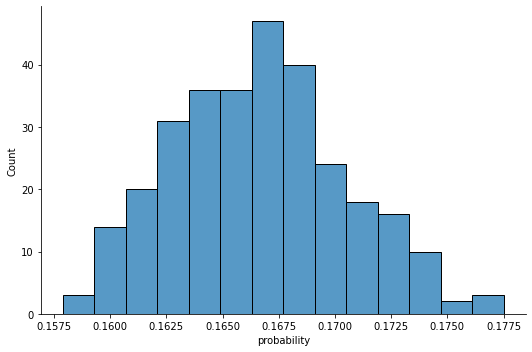

In [357]:
hist = sns.displot(
    data=df,
    x='probability',
    kind='hist',
    height=5,
    aspect=1.5,
)

### Rolling four die: What's the probability distribution of rolling a six? 

In [358]:
a = np.random.randint(1, 7, 4 * 10)
a.reshape(-1, 4)

array([[1, 3, 6, 3],
       [1, 3, 3, 1],
       [5, 3, 2, 1],
       [5, 3, 5, 2],
       [3, 3, 5, 3],
       [2, 5, 6, 1],
       [1, 3, 3, 5],
       [5, 5, 5, 3],
       [6, 1, 3, 4],
       [1, 1, 6, 1]])

In [359]:
allprobs = []
experiments = 300

for i in range(experiments):
    a = np.random.randint(1, 7, 4 * trials)
    allprobs.append(len([x for x in a.reshape(-1, 4) if 6 in x]) / trials)

In [360]:
df = pd.DataFrame(allprobs, columns=['probability'])

In [361]:
df.mean()

probability    0.517973
dtype: float64

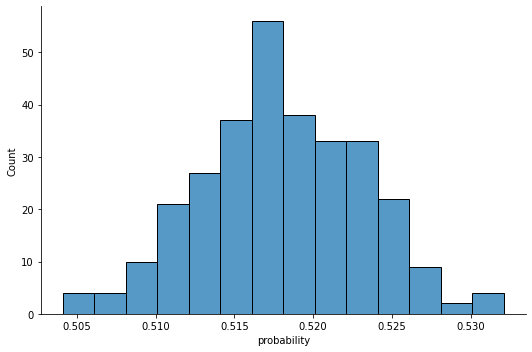

In [362]:
hist = sns.displot(
    data=df,
    x='probability',
    kind='hist',
    height=5,
    aspect=1.5,
)

# Random walks and gambler's ruin
You start with $20. The game you play is to flip a coin each turn, you win one dollar if you get heads, you lose one dollar if you get tails. Play for 500 rounds, what is the expected value?

In [363]:
trials = 500
cash = [20]

In [364]:
rounds = np.random.randint(0, 2, trials)
rounds

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [365]:
for r in rounds:
    # it takes money to make money
    if cash[-1] == 0:
        cash.append(0)
    elif r == 0:
        cash.append(cash[-1] - 1)
    else:
        cash.append(cash[-1] + 1)

In [366]:
df = pd.DataFrame(cash, columns=['cash'])
df.head()

,cash
0,20
1,19
2,20
3,19
4,20


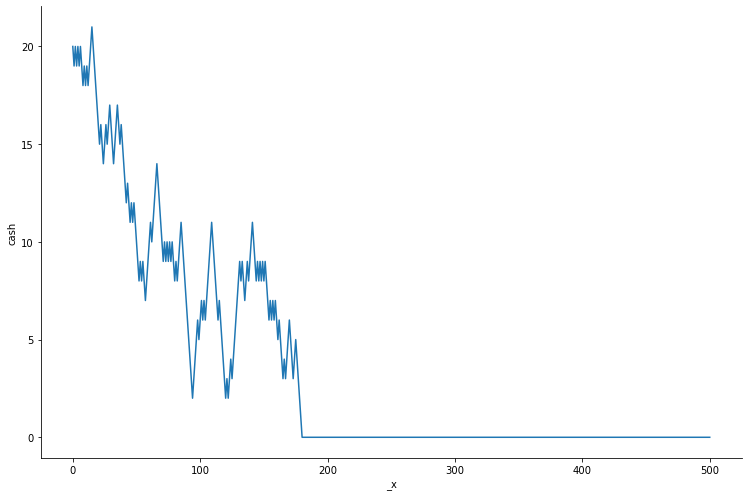

In [367]:
line = sns.relplot(
    data=df,
    x=df.index,
    y='cash',
    height=7,
    aspect=1.5,
    kind='line'
)

# Monte Carlo Simulation

In [368]:
experiments = 50
# experiments = 500

trials = 500
initial_cash = 20

In [369]:
df = pd.DataFrame()

for e in range(experiments):
    rounds = np.random.randint(0, 2, trials - 1)
    cash = [initial_cash]
    for r in rounds:
        # it takes money to make money
        if cash[-1] == 0:
            cash.append(0)
        elif r == 0:
            cash.append(cash[-1] - 1)
        else:
            cash.append(cash[-1] + 1)
    
    df = df.copy() # fix fragmentation
    df[e] = cash

In [370]:
df.shape

(500, 50)

In [371]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
1,21,21,21,21,19,21,21,19,19,19,...,19,21,21,21,19,21,19,21,19,19
2,20,22,22,20,18,20,20,20,18,20,...,18,22,22,22,20,22,18,20,18,18
3,19,21,23,21,19,21,21,21,17,19,...,17,21,21,21,19,23,17,19,17,17
4,18,20,22,20,18,20,22,22,18,20,...,16,20,22,20,18,22,18,20,18,16


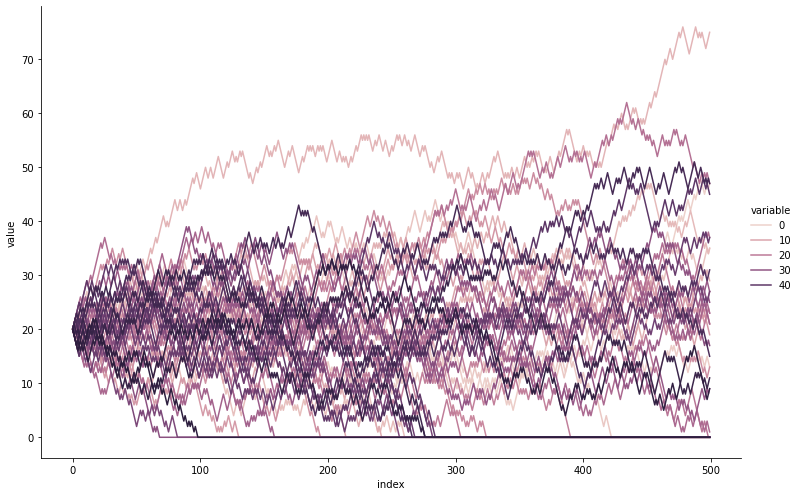

In [372]:
df_melted = pd.melt(df.reset_index(), id_vars=['index'])

line = sns.relplot(
    data=df_melted,
    x='index',
    y='value',
    hue='variable',
    height=7,
    aspect=1.5,
    kind='line'
)

## End Result

In [373]:
df = pd.DataFrame([df.loc[len(df) - 1, col] for col in df.columns], columns=['end_result'])

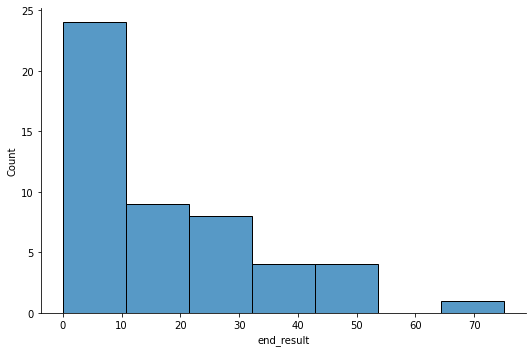

In [374]:
hist = sns.displot(
    data=df,
    x='end_result',
    kind='hist',
    height=5,
    aspect=1.5,
)